In [8]:
from collections import deque
from random import random
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from numpy.random import poisson
import requests

In [29]:
# classes
class Queue(deque):
    #static properties
    population = 0
    
    #initializing a queue, inherits from deque class
    def __init__(self, iterable=(), maxlen=None):
        deque.__init__(self, iterable,maxlen)
        self.id = Queue.population
        self.history = []
        Queue.population+=1
        
    #record the queue length at a moment in time
    def record(self, time):
        self.history.append([time,len(self)])
    
class Car:
    # static properties
    population = 0
    cars = []
    exited = []
    
    
    #initializing a car
    def __init__(self, time):
        #store variables on instance
        self.id = Car.population
        self.traveled = 0
        self.history = []
        self.t_arrival = time
        # update the static properties
        Car.population += 1
        Car.cars.append(self)
        
    ###various methods
    
    #traverse an intersection
    def traverse(self,queue):
        self.history.append(queue.id)#record where it's been for debugging
        self.traveled += 1 #increment the travel number
    
    #record the exit time and add car to list of exited vehicles
    def exit(self, time):
        self.t_exit = time
        Car.exited.append(self)

    def __repr__(self):
        return str(vars(self))


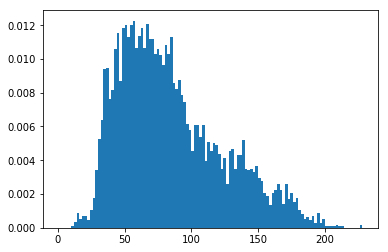

In [31]:
## global variables
green = False
N = 20
queues = map(lambda x: Queue(), range(N))
green_time = 15.
cycle = 30.
time = 0
trip_length = 10
saturation = .95 
arrival_rate = (saturation * green_time)/(trip_length*cycle) #am i calculating this right?

## function that runs the simulation one time unit
def tick():
    global time, green
    time += 1

    if time % green_time == 0: #this works because our green time is half our cycle length
#         s.post('http://localhost:3000/hello',params={"queues":map(len,queues)})
        green = not green #switch the signal

    if green:
        switches = [] #a list of which cars to move where

        for (i, queue) in enumerate(queues):
            if len(queue) > 0:#if there are cars in the queue
                car = queue.pop() #pop the rightmost car off the queue
                car.traverse(queue) #have the car traverse the queue
                if car.traveled < trip_length: #if it still has somewhere to go
                    receiving_queue = queues[i+1] if i < (N-1) else queues[0] #find the next queue
                    switches.append((car, receiving_queue)) 
                else: #remove the car
                    car.exit(time)

        for (car, receiving_queue) in switches: #add traversed cars to the new queues
            receiving_queue.appendleft(car)
            
    for queue in queues: 
        queue.record(time) #keep a record of the queue length
        if random() < arrival_rate: # if passes bernoulli trial. i am not sure if i'm doing this right.
            queue.appendleft(Car(time)) #add a new car
            
for i in range(5000):
    tick()

filtered = filter(lambda x: x.t_arrival > 2000,Car.exited)
delays = map(lambda x: x.t_exit-x.t_arrival,filtered)
delays.sort()
plt.cla()
hist = plt.hist(delays,bins=range(0, max(delays) + 2, 2),density=True)
plt.show()

In [14]:
# code to connet o browser
# s = requests.Session()
# for i in range(1000):
#     s.post("http://localhost:3000/hello",params={"hello":i})